### A computer vision problem - Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 239 226 237 235 

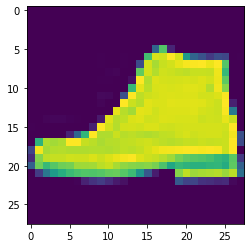

In [6]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling *model.fit * asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [9]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5005 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3754 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3386 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3125 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2936 - accuracy: 0.8914


In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 943us/step - loss: 0.3620 - accuracy: 0.8682


[0.36196258664131165, 0.8682000041007996]

### Exploration Exercises

In [14]:
# Understanding Predictions and Probability
classifications = model.predict(test_images)

print(classifications[0])
print('----')
print(test_labels[0])

[3.8654571e-06 4.7370957e-08 1.1363285e-06 9.4680536e-06 2.1898209e-06 1.1902564e-02 1.9356274e-04 1.5371094e-02 1.1990357e-05 9.7250420e-01]
----
9


These numbers are a probability that the value being classified is the corresponding value), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly a 9.

In [16]:
# Let's now look at the layers in your model. 
# Experiment with different values for the dense layer with 512 neurons.

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2013
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0808
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0369
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0645
[3.7768140e-09 4.2169104e-09 1.8922913e-07 4.3503448e-04 3.6996399e-13 1.0274692e-08 2.2514401e-12 9.9956459e-01 5.8798242e-09 1.4757937e-07]
7


Callbacks to stop training when a threshold is reached

In [17]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


2.2.0
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4728
Epoch 2/5
1852/1875 [============================>.] - ETA: 0s - loss: 0.3557
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3553
